<center>
<h1> Data Mining/Homework2/Fall 2022 </h1>
<hr>
<center>
<h1> Objectives </h1>

<h2> Learn more about the analysis of the FARS database  </h2>
<h2> Recreate data analysis in a published paper </h2>
<h2> Perform cluster analys is on NHTSA FARS data </h2>  
<h2> Resubmit your PCA analysis from HW1 </h2> 
<hr>
<h3> Course: MCIS6273 Data Mining </h3>

<h3><mark>Due date: 11:59 PM, OCT 24, 2022 (Monday)</mark></h3>
<h3>Total Points: 20</h3>

<h4>Instructor: Keith Maull </h4>


</center>

### Student Details
* Name: Manoj Korepu
* Student ID: 999901236
* Date:10/19/2022
* Time: 11:20 AM

In [1]:
# The necessary modules
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('ggplot')
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.stats as st
from scipy.cluster.hierarchy import dendrogram

In [2]:
###############################
#### READING IN THE DATA ######
###############################
csvs = os.listdir('temp_csv')

df = pd.read_csv('temp_csv/temp_csv0/accident.csv')
for folder in csvs[1:]:
    try:
        df1 = pd.read_csv(f'temp_csv/{folder}/accident.csv')
    except:
        df1 = pd.read_csv(f'temp_csv/{folder}/accident.csv', encoding='ISO8859-1')
    df = pd.concat([df, df1], axis=0)

df = df.reset_index(drop = True)

# Get the pedestrians
dfp = df[df['HARM_EV'] == 8]

state = dfp[['STATE','STATENAME']].dropna()
state_dict = dict(zip(state['STATE'], state['STATENAME']))

# Map the states to their statenames
dfp['STATENAME'] = dfp['STATE'].map(state_dict)

# Get the Kansas DataFrame
kansas = dfp[dfp['STATENAME'] == 'Kansas']

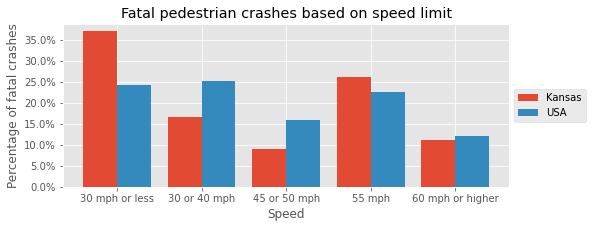

In [3]:
####################################
##### Plotting figure 15 ###########
####################################

###################
### USA ###########
###################
speed_limit_us = dfp[['SP_LIMIT', 'FATALS']]
# Sum the fatalities by the speed limit
sum_speed = speed_limit_us.groupby('SP_LIMIT')['FATALS'].sum()

speed_dict = {'30 mph or less': 0,
             '30 or 40 mph' : 0,
             '45 or 50 mph' : 0,
             '55 mph' : 0,
             '60 mph or higher': 0}
total_fatals = 0
for index in sum_speed.index:
    if int(index) in range(0, 31):
        speed_dict['30 mph or less'] += sum_speed[index]
    elif int(index) in range(31, 41):
        speed_dict['30 or 40 mph'] += sum_speed[index]
    elif int(index) in range(41, 51):
        speed_dict['45 or 50 mph'] += sum_speed[index]
    elif int(index) in range(51, 60):
        speed_dict['55 mph'] += sum_speed[index]
    else:
        speed_dict['60 mph or higher'] += sum_speed[index]
    total_fatals += sum_speed[index] # Find the total fatalities
    
speed_percent = {k:(speed_dict[k]/total_fatals)*100 for k in speed_dict}

###################
### KANSAS ########
###################
speed_limit_ka = kansas[['SP_LIMIT', 'FATALS']]
# Sum the fatalities by the speed limit
sum_speed_ka = speed_limit_ka.groupby('SP_LIMIT')['FATALS'].sum()

speed_dict_ka = {'30 mph or less': 0,
             '30 or 40 mph' : 0,
             '45 or 50 mph' : 0,
             '55 mph' : 0,
             '60 mph or higher': 0}
total_fatals_ka = 0
for index in sum_speed_ka.index:
    if int(index) in range(0, 31):
        speed_dict_ka['30 mph or less'] += sum_speed_ka[index]
    elif int(index) in range(31, 41):
        speed_dict_ka['30 or 40 mph'] += sum_speed_ka[index]
    elif int(index) in range(41, 51):
        speed_dict_ka['45 or 50 mph'] += sum_speed_ka[index]
    elif int(index) in range(51, 60):
        speed_dict_ka['55 mph'] += sum_speed_ka[index]
    else:
        speed_dict_ka['60 mph or higher'] += sum_speed_ka[index]
    total_fatals_ka += sum_speed_ka[index] # Find the total fatalities
    
speed_percent_ka = {k:(speed_dict_ka[k]/total_fatals_ka)*100 for k in speed_dict_ka}

#######################################
######## CODE PLOT FIGURE 15 ##########
#######################################
fig, ax = plt.subplots(figsize = (8, 3))

x_axis = list(speed_dict.keys())  # X axis labels
x = np.arange(len(x_axis))
y1, y2 = list(speed_percent.values()), list(speed_percent_ka.values())

ax.bar(x-0.2, y2, 0.4, label = 'Kansas')
ax.bar(x+0.2, y1, 0.4, label = 'USA')
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel("Speed"), plt.ylabel("Percentage of fatal crashes")
plt.title("Fatal pedestrian crashes based on speed limit")
plt.xticks(x, x_axis)
plt.show()

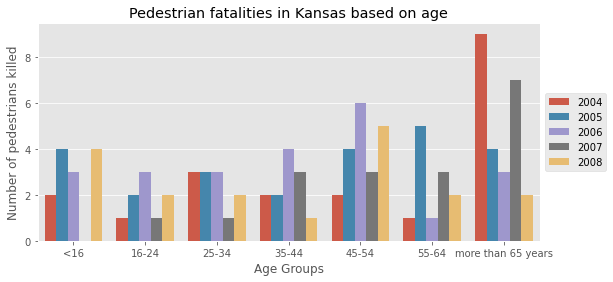

In [4]:
####################################
##### Figure 4 #####################
####################################
# Reading in the datasets
csvs_ = os.listdir('2004-2008')
df_person = pd.read_csv('2004-2008/person.csv')
for file,i in zip(csvs_[1:],range(1,5)):
    try:
        df1 = pd.read_csv(f'2004-2008/person{i}.csv')
    except:
        df1 = pd.read_csv(f'2004-2008/person{i}.csv', encoding='ISO8859-1')
    df_person = pd.concat([df_person, df1], axis=0)

# Get the pedestrians only
dfp_person = df_person[df_person['HARM_EV'] == 8].reset_index(drop = True)

# Select the year between 2004 - 2009
dfp_person = dfp_person[dfp_person['DEATH_YR'].isin(range(2004, 2009))]

# Select the state of KANSAS
dfp_person_kansas = dfp_person[dfp_person['STATE'] == 20]

# group the data by age
dfp_person_kansas['CATEGORY'] = pd.cut(dfp_person_kansas['AGE'], bins=[0, 16, 24, 34, 44, 54, 64, 99], 
       include_lowest=True, labels=['<16', '16-24', '25-34', '35-44', '45-54', '55-64', 'more than 65 years'])

group_age_year = dfp_person_kansas.groupby(["DEATH_YR", "CATEGORY"])["CATEGORY"].count()

# Get the counts of every age into a dataframe
age_cat_count = group_age_year.to_frame().rename(columns = {'CATEGORY':'CAT_COUNT'}).reset_index()

#############################
##### CODE TO PLOT ##########
#############################
plt.figure(figsize = (9, 4))
sns.barplot(data = age_cat_count, x = "CATEGORY", y = "CAT_COUNT", hue = "DEATH_YR")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel("Age Groups")
plt.ylabel("Number of pedestrians killed")
plt.title("Pedestrian fatalities in Kansas based on age")
plt.show()

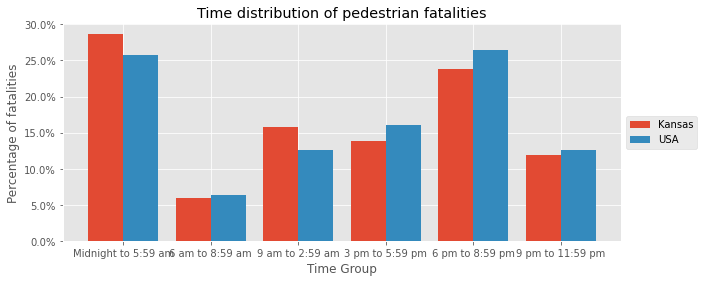

In [5]:
####################################
##### Figure 9 #####################
####################################
#######
# USA #
#######
df_time = dfp_person[['HOUR']]
df_time["HOUR_CATEGORY"] = pd.cut(df_time['HOUR'], bins=[0, 6, 9, 15, 18, 21, 24], 
       include_lowest=True, labels=['Midnight to 5:59 am', 
                                    '6 am to 8:59 am', 
                                    '9 am to 2:59 am', 
                                    '3 pm to 5:59 pm', 
                                    '6 pm to 8:59 pm', 
                                    '9 pm to 11:59 pm'])
group_time = df_time['HOUR_CATEGORY'].value_counts(sort = False).to_frame()

##########
# KANSAS #
##########
df_time_ka = dfp_person[['HOUR']][dfp_person['STATE'] == 20]
df_time_ka["HOUR_CATEGORY"] = pd.cut(df_time_ka['HOUR'], bins=[0, 6, 9, 15, 18, 21, 24], 
       include_lowest=True, labels=['Midnight to 5:59 am', 
                                    '6 am to 8:59 am', 
                                    '9 am to 2:59 am', 
                                    '3 pm to 5:59 pm', 
                                    '6 pm to 8:59 pm', 
                                    '9 pm to 11:59 pm'])
group_time_ka = df_time_ka['HOUR_CATEGORY'].value_counts(sort = False).to_frame()


##########
## PLOT ##
##########
fig, ax = plt.subplots(figsize = (10, 4))

x_labels = group_time.index.tolist()  # X axis labels
x = np.arange(len(x_labels))
y1 = (group_time_ka['HOUR_CATEGORY']/group_time_ka['HOUR_CATEGORY'].sum())*100
y2 = (group_time['HOUR_CATEGORY']/group_time['HOUR_CATEGORY'].sum())*100

ax.bar(x-0.2, y1, 0.4, label = 'Kansas')
ax.bar(x+0.2, y2, 0.4, label = 'USA')
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel("Time Group"), plt.ylabel("Percentage of fatalities")
plt.title("Time distribution of pedestrian fatalities")
plt.xticks(x, x_labels)
plt.show()

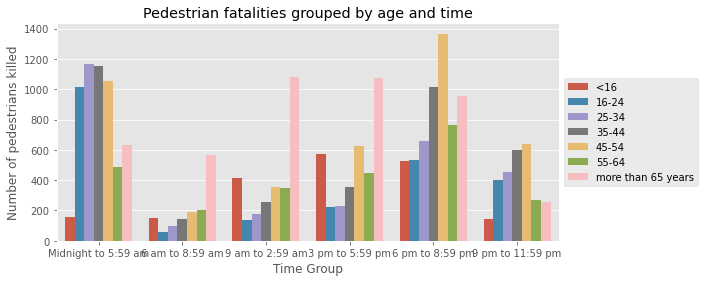

In [6]:
#################################################
### Combining data from  figure 4 and figure 9 ##
#################################################
age_time = dfp_person[['AGE', 'HOUR']]

# Grouping Hour into categories
age_time["HOUR_C"] = pd.cut(age_time['HOUR'], bins=[0, 6, 9, 15, 18, 21, 24], 
       include_lowest=True, labels=['Midnight to 5:59 am', 
                                    '6 am to 8:59 am', 
                                    '9 am to 2:59 am', 
                                    '3 pm to 5:59 pm', 
                                    '6 pm to 8:59 pm', 
                                    '9 pm to 11:59 pm'])
# Grouping Age into categories
age_time['AGE_C'] = pd.cut(age_time['AGE'], bins=[0, 16, 24, 34, 44, 54, 64, 99], 
       include_lowest=True, labels=['<16', '16-24', '25-34', '35-44', '45-54', '55-64', 'more than 65 years'])

# Group by Age categories and Hour categories
counts_agetime = age_time.groupby(['AGE_C', 'HOUR_C']).count().reset_index()

#############################
##### CODE TO PLOT ##########
#############################
plt.figure(figsize = (9, 4))
sns.barplot(data = counts_agetime, x = "HOUR_C", y = "AGE", hue = "AGE_C")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel("Time Group")
plt.ylabel("Number of pedestrians killed")
plt.title("Pedestrian fatalities grouped by age and time")
plt.show()

-------------------------
Cluster 5; Centroids
-------------------------
[[-8.30798631e-02  3.12034430e-02  3.08106690e-03  3.82908581e-02
   2.78724454e-01 -2.06108912e-02  9.15724352e-01  8.80701941e-02
  -7.06098745e-02 -2.88476397e-02 -8.93942233e-01  4.29200400e-01
   1.54228758e+00  1.53408212e+00 -5.92381668e-01  2.96674666e+00
   3.01142789e+00  1.95539286e-01 -8.33542475e-01 -4.14432173e-01
  -6.03855099e-01 -4.84930434e-01 -5.95864494e-01 -2.44834510e-01
  -1.54259610e-01 -1.38138557e-01 -1.07273083e+00 -4.86579814e-01]
 [ 6.17523357e-02 -5.21502754e-03  2.21212246e-02  7.74248027e-03
  -2.00482803e-01 -2.06108912e-02 -1.02586554e+00 -2.91271140e-01
   1.49377551e-01 -5.62072628e-02  9.85755538e-01 -1.90034719e-01
  -4.92651113e-01 -4.80390439e-01  6.60064869e-01 -3.11341586e-01
  -3.05768001e-01 -6.60533423e-02  1.06412838e+00  1.08214989e+00
   1.11680601e+00  3.08009324e+00  2.71491035e+00  2.70619511e-02
  -1.03904221e-01 -1.35610834e-01  1.51527792e-01  3.07921844e+00]
 

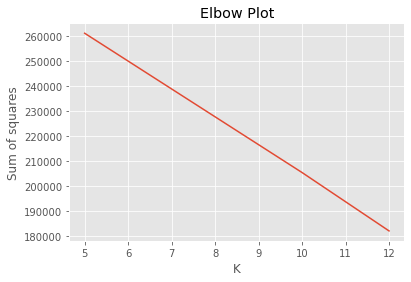

Kansas would belong to the cluster: 7

-------------------------------------------
The states which are most like Kansas are:
-------------------------------------------
        South Dakota
             Wyoming
            Delaware
             Vermont
               Idaho
       New Hampshire
              Nevada
               Maine
                Iowa
              Hawaii
District of Columbia
            Colorado
            Missouri
          Washington
              Oregon
          New Mexico
            Arkansas
           Wisconsin
            Oklahoma
             Arizona
            Virginia
       Massachusetts
            Kentucky
            Maryland
           Louisiana
          New Jersey
                Ohio
      North Carolina
        Pennsylvania
               Texas
-------------------------------------------


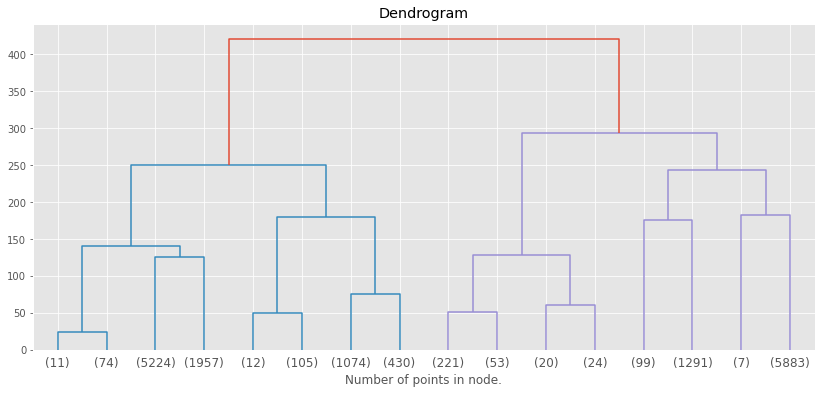

In [7]:
##########################################################################
########### (50%) Perform cluster analysis on NHTSA FARSdata. ############
##########################################################################
person = pd.read_csv('PERSON.CSV')

# Select rows where harmed person is pedestrian and Eliminate KANSAS state
dfp = person[(person['HARM_EV'] == 8)]

# Restrict to numeric features
dfp = dfp._get_numeric_data()

# Drop columns with NAN values
dfp = dfp.dropna(axis = 1)

# Select Kansas and Other states differently
kansas_df = dfp[(dfp['STATE'] == 20)]
US_df = dfp[(dfp['STATE'] != 20)]
state = US_df[['STATE']]

# Eliminate year as a feature and other columns that won't be 'numerically feasible'
US_df = US_df.drop(columns = ['DEATH_YR', 'HARM_EV', 'STATE', 'COUNTY'])
kansas_df = kansas_df.drop(columns = ['DEATH_YR', 'HARM_EV', 'STATE', 'COUNTY'])

# Scaling the data using Standard Scaler
scaler = StandardScaler()
scaler.fit(US_df) # Fit the data
US_scaled = scaler.transform(US_df)

# CLusters
K = [5, 10, 12]
sum_squares = []
for k in K:
    kmeans = KMeans(n_clusters = k, init='k-means++', max_iter = 200, n_init = 10, random_state = 0)
    kmeans.fit(US_scaled)
    sum_squares.append(kmeans.inertia_)
    print('-------------------------')
    print(f"Cluster {k}; Centroids")
    print('-------------------------')
    print(kmeans.cluster_centers_)
    print("--------------------------------------\n")

# Plot the sum of squares
plt.plot(K, sum_squares)
plt.xlabel("K"), plt.ylabel("Sum of squares")
plt.title("Elbow Plot")
plt.show()

# Finding out where Kansas fits in
kansas_labels = kmeans.predict(scaler.transform(kansas_df))

# Find the cluster that is most appearing
mode_label = st.mode(kansas_labels)[0][0]
print(f"Kansas would belong to the cluster: {mode_label}")

# Finding states that are like Kansas
state['Labels'] = kmeans.predict(US_scaled)

state_count = state.groupby(['STATE', 'Labels'])['Labels'].count().sort_values().groupby(level=0).tail(1).to_frame()
state_count = state_count.rename(columns = {"Labels":"Labels_Count"}).reset_index()

# Map the states to their statenames
state_count['State_Name'] = state_count['STATE'].map(state_dict)

# Getting the states that are the same as Kansas
kansas_like = state_count['State_Name'][state_count['Labels'] == mode_label]
print('\n-------------------------------------------')
print("The states which are most like Kansas are:")
print('-------------------------------------------')
print(kansas_like.to_string(index = False))
print('-------------------------------------------')

###################################
# Sklearn Aglomerative Clustering #
###################################
def plot_dendrogram(model, **kwargs):
    cts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_) # Get the length of the labels
    for i, merge in enumerate(model.children_):
        c_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                c_count += 1  # leaf node
            else:
                c_count += cts[child_idx - n_samples]
        cts[i] = c_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, cts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting compute_distances = True will add the attribute distances_ in the model.
aggmodel = AgglomerativeClustering(distance_threshold=None, n_clusters=10, compute_distances = True)

aggmodel = aggmodel.fit(US_scaled)
plt.figure(figsize = (14, 6))
plt.title("Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(aggmodel, truncate_mode="level", p=3)
plt.xlabel("Number of points in node.")
plt.show()